In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import cv2
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

2025-04-29 13:35:18.844239: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-29 13:35:18.844321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-29 13:35:18.878440: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-29 13:35:18.947741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-29 13:35:20.256548: W tensorflow/compiler/tf2

In [3]:
gpu = tf.config.experimental.list_physical_devices('GPU')
for g in gpu:
    tf.config.experimental.set_memory_growth(g, True)
len(gpu) # Check if GPU is available

2025-04-29 13:35:21.331018: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-29 13:35:21.450279: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-29 13:35:21.450485: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

1

# Reading the Images

glob is a Python module used to find all the file names in a folder that match a specific pattern (like *.jpg for all JPEG images)

    - glob helps you quickly search for files or folders matching a pattern.


In [4]:
normal = glob('/home/yuk/Documents/BigProject/Dataset/Normal/*.png')
tuberculosis = glob('/home/yuk/Documents/BigProject/Dataset/Tuberculosis/*.png')

In [5]:
img_nor = plt.imread(normal[69])
img_tub = cv2.imread(tuberculosis[49])
img_nor.shape , img_tub.shape

((512, 512, 3), (512, 512, 3))

img_nor.shape ---> (512, 512, 3)
img_tub.shape ---> (512, 512, 3)

(Height , Width , Channels)

# Display Images

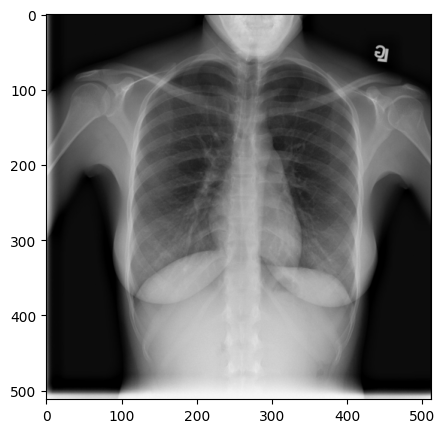

In [6]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(img_nor) # Image of a normal lung without TB  
plt.show()

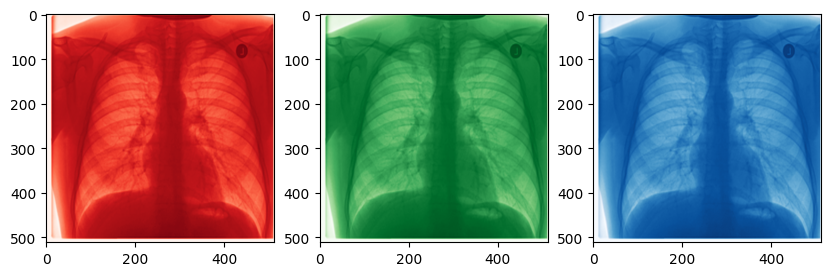

In [7]:
fig, axs = plt.subplots(1 ,3 , figsize=(10, 5))
axs[0].imshow(img_tub[:,:,0], cmap='Reds') 
axs[1].imshow(img_tub[:,:,1], cmap='Greens') 
axs[2].imshow(img_tub[:,:,2], cmap='Blues')
plt.show()  

In [8]:
from skimage import exposure , img_as_float

image1 = img_as_float(img_nor)
image2 = img_as_float(img_tub)

gamma_corrected1 = exposure.adjust_gamma(image1, 0.5)
gamma_corrected2 = exposure.adjust_gamma(image2, 0.5)

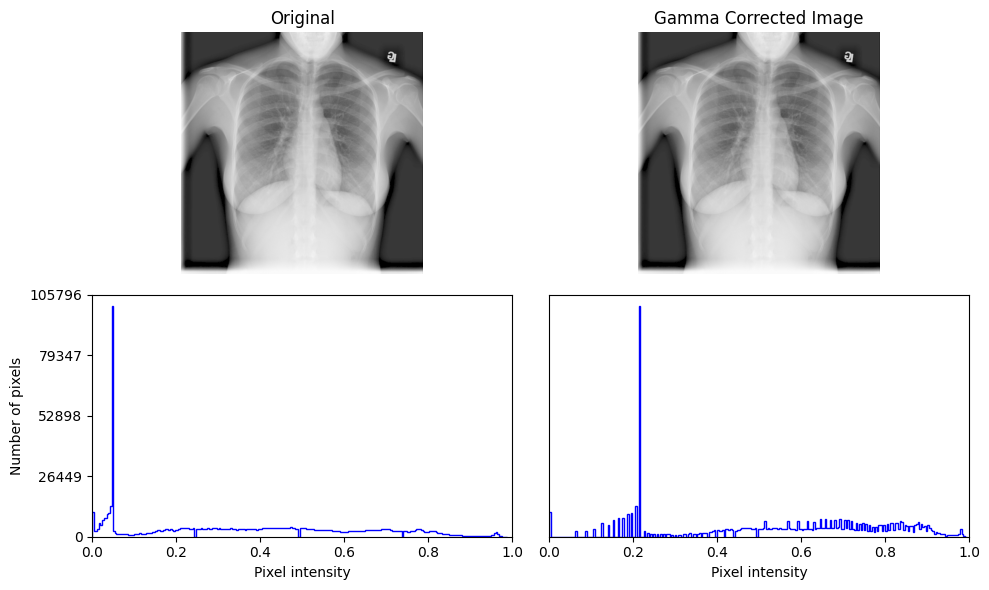

In [9]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image1.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected1.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the normal lung X-ray graph (top image), we can see that the blue line forms three distinct humps or peaks-one small peak at the far left, a medium peak in the middle, and a taller peak on the right. This pattern shows that healthy lungs have a good mix of different brightness levels, representing the natural contrast between air-filled areas (darker) and tissue/bone structures (brighter). After gamma correction, these brightness values spread out into a pattern that looks like a comb with many spikes, but still maintain the overall shape with multiple peaks, showing the lung's normal varied texture.

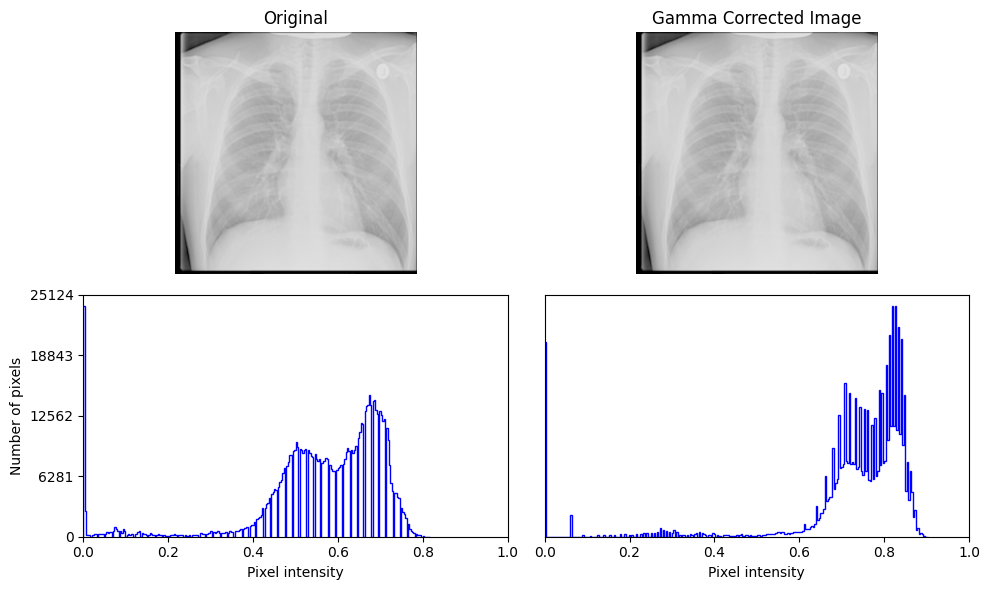

In [10]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image2.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected2.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the tuberculosis (TB) lung X-ray graph (bottom image), the most noticeable difference is how the brightness values are more concentrated into one main mountain-shaped area in the middle-right side of the graph, with a tall spike at the far left. This shows that TB causes more uniform density in the lungs as infection creates areas that appear similar in brightness. After gamma correction, the TB lung's histogram shifts dramatically to the right side with tall, regular spikes, indicating that the diseased tissue becomes more uniformly bright. This difference in patterns helps doctors and computers distinguish between healthy lungs and those affected by tuberculosis.

Normal Lung (first set):
The graph for the healthy lung shows a wide and balanced spread of pixel brightness, with several peaks. This means the lung tissue is varied and air spaces are clear, which is typical for healthy lungs. The pattern reflects normal, well-aerated lung structure.

TB Lung (second set):
The TB lung graph is more concentrated in the middle and right, with fewer peaks and a more uniform shape. This indicates the lung tissue is denser and less varied, which happens when infection or scarring fills the air spaces. This pattern is a sign of disease affecting the lung’s normal structure.

# Loading Images with Keras Utilities

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/home/yuk/Documents/BigProject/Dataset',image_size=(512, 512),batch_size=32,color_mode='grayscale')

Found 2400 files belonging to 2 classes.


2025-04-29 13:35:23.085652: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-29 13:35:23.086083: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-29 13:35:23.086237: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

This turns the TensorFlow dataset data into a NumPy-style iterator, so you can loop through the data and get batches as normal NumPy arrays.

    - We need this because it does not load data directly into the memory , so we just have to use the iterator to convert them into normal numpy array such as ex (x,y)

In [12]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [13]:
batch = data_iterator.next()
# Images represented as a numpy array and labels represented as a numpy array
batch[0].shape , batch[1].shape 

((32, 512, 512, 1), (32,))

class 1 contains TB ,
class 0 Does not contain any TB

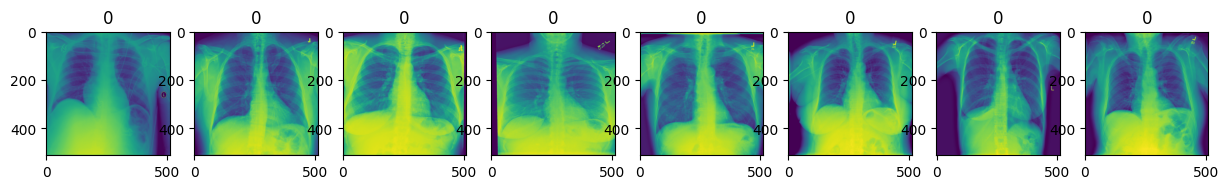

In [14]:
fig , ax = plt.subplots(ncols=8 , figsize=(15,15))
for idx , img in enumerate(batch[0][:8]): # Gets first 8 images
    ax[idx].imshow(img.astype(int))       
    ax[idx].set_title(batch[1][idx]) # Gets the first 8 labels as well

In [15]:
batch[1] # Labels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [16]:
batch[0].max() # checking the max pixel value

255.0

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

This process improves the contrast in each image, making the details inside the lungs clearer and more visible.

# Normalizing

Adjusting the pixel intensity for better image processing , scaling
the values to [0 , 1]

In [17]:
from tensorflow import keras
tf.config.optimizer.set_jit(True)  

In [18]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
import tf_clahe
from tensorflow.keras import layers

gpu = True

@tf.function(experimental_compile=True)  # Enable XLA
def fast_clahe(img):
    return tf_clahe.clahe(img, gpu_optimized=True)

IMG_SIZE = 128

data = data.map(lambda images, label: (tf_clahe.clahe(tf.cast(images, tf.float32)), label))

resize_and_rescale = tf.keras.Sequential([   # Normalizing 
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

def preproce_rescaling(image, label):
    image = resize_and_rescale(image)
    return image, label

data = data.map(preproce_rescaling)


In [20]:
for image, label in data.take(1):
    print("Min pixel value:", tf.reduce_min(image).numpy())
    print("Max pixel value:",tf.reduce_max(image).numpy()) 

Min pixel value: 0.0
Max pixel value: 1.0


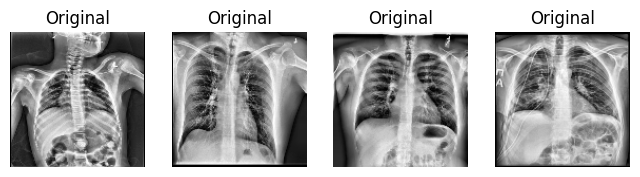

In [21]:
for images, _ in data.take(1):
    plt.figure(figsize=(8, 4))
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title('Original')
        plt.axis('off')

In [22]:
import tensorflow_addons as tfa

@tf.function(experimental_compile=True)
def image_sharpening(image ,label):
    sharpened =  tfa.image.sharpness(
            image,
            factor=1.5
        )
    return sharpened , label

data = data.map(image_sharpening)


# Data Augmentation

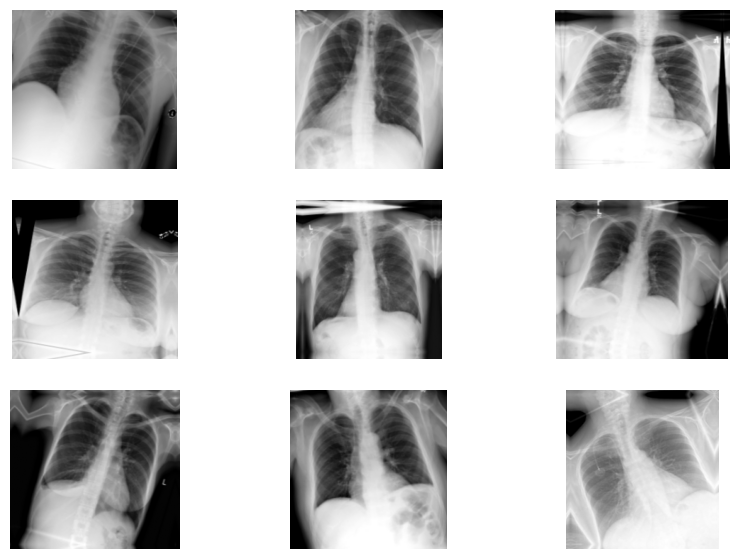

In [23]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.Resizing(224, 224),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.GaussianDropout(0.1),
    tf.keras.layers.RandomBrightness(0.1), 
    tf.keras.layers.RandomWidth(0.1),
])

plt.figure(figsize=(10, 7))
for i in range(9):
    augmented_image = data_augmentation(batch[0][i])  # Using batch[0] to access images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"),cmap='gray')  
    plt.axis("off")

# CNN Model Training

In [24]:
len(data) # ---------> There are 54 , 32 batches 

75

In [25]:
train_data = data.take(52)
val_data = data.skip(52).take(11)
test_data = data.take(63).take(12)

In [26]:
from tensorflow.keras import layers, models, regularizers 
from keras.layers import Dropout


train_labels = np.concatenate([labels.numpy() for _, labels in train_data])

# Calculate class weights
class_counts = np.bincount(train_labels)
total_samples = len(train_labels)
class_weights = {
    0: total_samples / (2 * class_counts[0]),  
    1: total_samples / (2 * class_counts[1])   
}

print("Class weights:", class_weights)


2025-04-29 13:36:07.143322: I external/local_xla/xla/service/service.cc:168] XLA service 0x72e030008080 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-04-29 13:36:07.143504: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1745913967.387541  209748 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-04-29 13:36:07.390839: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-29 13:36:11.725308: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


Class weights: {0: 0.7092924126172208, 1: 1.694501018329939}


32 → 64 → 128 → 256

In [27]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 32)        128       
 chNormalization)                                                
                                                      

In [29]:
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 32)        128       
 chNormalization)                                                
                                                      

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',patience=5,min_delta=0.001,restore_best_weights=True)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

Class_weights: {0: 0.77, 1: 1.43}

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,
    patience=3,
    min_lr=1e-7
)

hist = model.fit(train_data , 
                 epochs = 20 , 
                 class_weight=class_weights, 
                 validation_data= val_data, 
                 callbacks=[early_stop, lr_scheduler]
                 ) 

Epoch 1/20


2025-04-29 13:38:19.325407: I external/local_xla/xla/service/service.cc:168] XLA service 0x2c49a620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-29 13:38:19.330435: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-04-29 13:38:19.425179: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-29 13:38:20.326201: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


52/52 [==============================] - 281s 4s/step - loss: 0.7510 - accuracy: 0.5319 - val_loss: 0.7726 - val_accuracy: 0.2727 - lr: 1.0000e-04
Epoch 2/20
52/52 [==============================] - 276s 5s/step - loss: 0.7043 - accuracy: 0.5661 - val_loss: 0.8552 - val_accuracy: 0.2727 - lr: 1.0000e-04
Epoch 3/20
52/52 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5547

2025-04-29 13:50:00.859178: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


52/52 [==============================] - 284s 5s/step - loss: 0.6857 - accuracy: 0.5547 - val_loss: 0.9142 - val_accuracy: 0.2955 - lr: 1.0000e-04
Epoch 4/20
52/52 [==============================] - 333s 6s/step - loss: 0.6580 - accuracy: 0.5992 - val_loss: 0.9855 - val_accuracy: 0.2869 - lr: 1.0000e-04
Epoch 5/20
52/52 [==============================] - 285s 5s/step - loss: 0.6443 - accuracy: 0.6502 - val_loss: 1.0130 - val_accuracy: 0.2898 - lr: 5.0000e-05
Epoch 6/20
52/52 [==============================] - 279s 5s/step - loss: 0.6382 - accuracy: 0.6370 - val_loss: 0.9952 - val_accuracy: 0.3011 - lr: 5.0000e-05
Epoch 7/20
52/52 [==============================] - 284s 5s/step - loss: 0.6303 - accuracy: 0.6593 - val_loss: 0.9430 - val_accuracy: 0.3068 - lr: 5.0000e-05
Epoch 8/20
52/52 [==============================] - 330s 6s/step - loss: 0.6106 - accuracy: 0.6761 - val_loss: 0.9119 - val_accuracy: 0.2869 - lr: 2.5000e-05
Epoch 9/20
52/52 [==============================] - 280s 5s/ste

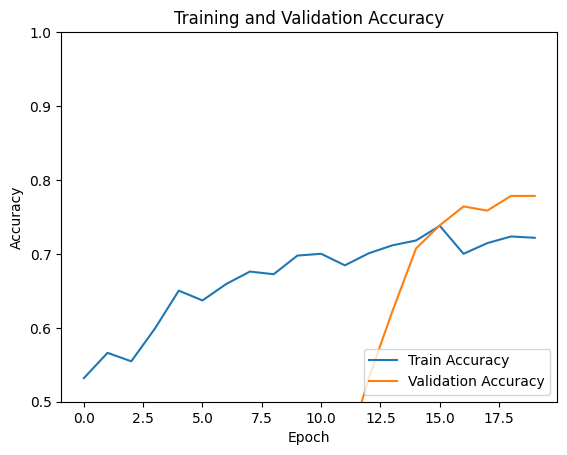

12/12 - 36s - loss: 0.5526 - accuracy: 0.7917 - 36s/epoch - 3s/step
Test accuracy: 0.7917


In [33]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')